# Praca s datami a vizualizacia

<!--
navody na pouzivanie pandas, matplotlib a numpy na spracovanie dat. Niesu to informacie o tom ako robit explorativnu analyzu, ale ako pouzivat kniznice

Z tohoto povyberam zaujimave casti, spojim ich s nejakou kapitolou v knihe o tom ako riesit spracovanie, cistanie dat a transformovanie dat
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_10_pandas_introduction.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_11_pandas_adding_data.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_12_pandas_groupby.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_13_pandas_movies.ipynb 
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_14_pandas_reshape.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_15_pandas_transforming.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_21_pandas_processing.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_22_pandas_cleaning.ipynb

http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_23_titanic_example.ipynb
-->

# Obsah dnesnej prezentacie

* Intro do pouzivania kniznic Pandas, Matplotlib a Numpy
* Zaklady explorativnej analyzy

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn

In [2]:
from IPython.display import Image

### Na co nam je Pandas?
* importovanie dat zo standardnych formatov
* vycistit
* pozriet sa do dat (statistiky, sampling, zakladne grafy)
* posunut data na analyzu / trenovanie modelov

### Co je Pandas?
* Python komunita sa inspirovala a ukradla to dobre z `data.frame` struktury v R alebo obdobnych struktur v Matlabe alebo Octave
* Umoznuje zakladne operacie s datami, sampling, group by, merge, ...
* Ako zaklad je pouzite NumPy pole

### Zakladne ulohy
* Spracovanie chybajucich udajov (.dropna(), pd.isnull())
* Merge, join (concat, join)
* Group
* Zmena tvaru dat (pivotovanie) (stack, pivot)
* Praca s casovymi radmi (resampling, timezones, ..)
* Kreslenie

## Nieco k Numpy

In [ ]:
pole = [1,2,3]
pole * 3

In [ ]:
np_pole = np.array([1,2,3])
np_pole * 3

In [ ]:
x = np.arange(20).reshape(4, 5) # skusit viacere dimenzie
x

In [ ]:
x.shape

In [ ]:
x.ndim

In [ ]:
x.sum(axis=1)

In [ ]:
x.dtype

In [ ]:
a = np.array([.1,.2])
print(a)
a.dtype

In [ ]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
c

In [ ]:
c.dtype

In [ ]:
np.zeros((3,4))

In [ ]:
np.ones((2,5))

In [ ]:
np.linspace(0, 2, 9)

In [ ]:
x = np.linspace( 0, 2*np.pi, 100 )
f = np.sin(x)

In [ ]:
plt.plot(f)

In [ ]:
A = np.array( [[1,1], [0,1]] )
B = np.array( [[2,0], [3,4]] )

In [ ]:
A

In [ ]:
B

In [ ]:
np.transpose(B)

In [ ]:
A*B

In [ ]:
A.dot(B) # np.dot(A, B)

## Vyberanie prvkov

In [ ]:
a = np.arange(10)**3
a

In [ ]:
a[2]

In [ ]:
a[2:5]

In [ ]:
a[2:6:2]

In [ ]:
a[:6:2] = -1000
a

In [ ]:
a[ : :-1]

In [ ]:
b = np.arange(20).reshape(4,5)
b

In [ ]:
b[2,3]

In [ ]:
b[2,]

In [ ]:
b[:,2:4]

Dalsie operacie si pozrite 
* tu https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* a tu https://docs.scipy.org/doc/numpy-dev/reference/index.html

## Nejake ukazky k Pandas

Pandas pouziva Numpy pole a nad nim si postavili typ `Series` a `DataFrame`

In [ ]:
s = pd.Series([0,1,2,3,4])
s

In [ ]:
s.index

In [ ]:
s.values

In [ ]:
s[0]

In [ ]:
# na rozdiel od numpy vsak index moze byt aj nieco ine ako cislo
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

In [ ]:
s2['c']

In [ ]:
s2[2]

In [ ]:
# na vytvorenie Series objektu sa da pouzit aj asociatyvne pole
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

In [ ]:
population['France']

In [ ]:
# kedze je to postavene na Numpy, tak vieme robit vsetky zaujimave operacie
population * 1000

In [ ]:
population['Belgium':'Netherlands']

In [ ]:
population.mean()

Da sa pristupovat k prvkom tak, ako sme na to zvyknuti z R

In [ ]:
population[['France', 'Netherlands']]

In [ ]:
population[population > 20]

No a `DataFrame` je vlastne multidimenzionalny `Series`

In [ ]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

In [ ]:
countries.index

In [ ]:
countries.columns

In [ ]:
countries.values

In [ ]:
countries.dtypes

In [ ]:
countries.info()

In [ ]:
countries = countries.set_index('country')
countries

a vieme teraz velmi jednoducho pristupovat k jednotlivym stlpcom

In [ ]:
countries.area # countries['area']

In [ ]:
countries['population']*1000000 / countries['area'] # hustota zaludnenia

In [ ]:
# vieme si jednoducho vyrobit novy stlpec
countries['density'] = countries['population']*1000000 / countries['area']
countries

In [ ]:
# a na zaklade neho napriklad vyberat riadky
countries[countries['density'] > 300]

In [ ]:
# vieme potom napriklad usporiadavat
countries.sort_values(by='density', ascending=False)

In [ ]:
# namiesto summary mame
countries.describe()

In [ ]:
# velmi silna vlastnost je priamociare vykreslovanie
countries.density.plot()
# countries.density.plot(kind='bar')
# countries.plot()

In [ ]:
countries.plot(kind='scatter', x='population', y='area')

In [ ]:
help(countries.plot)

Kedze nam v `DataFrame` pribudla moznost vyberat stlpce podla nazvu, tak sa nam trochu skomplikovalo vyberanie prvkov oproti Numpy. Musime rozoznavat 
* vyberanie podla nazvu a 
* podla pozicie.


In [ ]:
countries['area'] # uz znamy vyber stlpcu

In [ ]:
countries[['area', 'density']] # alebo viacerych stlpcov

In [ ]:
# ked ale chceme rozsah, tak nam to pristupuje k riadkom
countries['France':'Netherlands']

Na pokrocilejsie vyberanie z tabulky pouzivame:
* `loc` a
* `iloc`

In [ ]:
# pristup ku konkretnej bunke pomocou riadka a stlpca
countries.loc['Germany', 'area']

In [ ]:
# tu sa daju pouzit aj rozsahy na oboch rozmeroch
countries.loc['France':'Germany', :]

In [ ]:
# ale aj vymenovanie
countries.loc[countries['density']>300, ['capital', 'population']]

In [ ]:
# iloc vybera podla poradia. Toto je podobne pristupovaniu k prvkom ako v Numpy
countries.iloc[0:2,1:3]

In [ ]:
# samozrejem, ze sa stale daju priradovat hodnoty
countries.loc['Belgium':'Germany', 'population'] = 10
countries

## Zmena tvaru dat pomocou Pandas

In [ ]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
# df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4), 'D':range(4)})
df

`unstack` presuva hodnoty v nejakom stlpci a vytvori z nich nazvy stlpcov

casto sa nam to hodi ak mame data, ktore su v trochu unej forme ako by sme potrebovali

In [ ]:
Image("img/stack.png")

In [ ]:
df = df.set_index(['A', 'B']) # najskor si vyberieme stlpec, ktory pouzijeme ako index. 
# Ten druhy bude dodavat hodnoty do nazvov novych stlpcov
df

In [ ]:
# teraz si povieme v ktorom stlpci su hodnoty a nechame to preskupit
result = df['C'].unstack()
result

In [ ]:
# opacna transformacia je stack. zoberie nazvy stlpcov a spravi z nich hodnoty
df = result.stack().reset_index(name='C')
df

In [ ]:
# pivot je velmi podobny ako unstack, ale necha nastavit mena stlpcov a moze ich byt viac
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df.pivot(index='A', columns='B', values='C')

In [ ]:
# pivot_table je podobne ako pivot, ale dokaze pracovat s duplicitnymi stlpcami a necha vas definovat agregacnu funkciu
df = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 'B':['a', 'b', 'a', 'b', 'a', 'b'], 'C':range(6)})
df

In [ ]:
df.pivot_table(index='A', columns='B', values='C', aggfunc=np.sum) #aggfunct je defaultne np.mean

## Ok, skusme sa konecne pohrat s nejakymi datami

In [ ]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t')
data.head()
# Data su tvorene meraniami nejakej veliciny v jednotlivych hodinach dna. 
# Co den, to riadok. Kazda hodina ma zvlast stlpec + je tu stlpec pre nejaky flag, ktory nas nezaujima

In [ ]:
import os
filename = "data/BETR8010000800100hour.1-1-1990.31-12-2012"
_, fname = os.path.split(filename)
station = fname[:7] # zaciatok nazvu suboru mi hovori kde to bolo namerane
colnames = ['date'] + [item for pair in zip(["{:02d}".format(i) for i in range(24)], ['flag']*24) for item in pair]

data = pd.read_csv(filename, sep='\t', header=None,
                   na_values=[-999, -9999], names=colnames, index_col='date')
data.head()

In [ ]:
# tie flagy nas nezaujimaju
data = data.drop(data.columns[1::2], axis=1)
data.head()

In [ ]:
data = data.stack()
data.head()

In [ ]:
data = data.reset_index(name=station)
data.head()

In [ ]:
# teraz tomu vyrobime novy index
data.index = pd.to_datetime(data['date'] + ' ' + data['level_1'])
data.head()

In [ ]:
# a zmazeme nepotrebne stlpce
data = data.drop(['date', 'level_1'], axis=1)
data.head()
# Teraz uz mame data, s ktorymi sa uz da nieco robit

Ja mam tych suborov viac. Kazdy obsahuje data z inej meracej stanice. Aby som zjednodusil prezentaciu, tak predchadzajuci kod som dal do cyklu a vlozil do skriptu

In [ ]:
import airbase
no2 = airbase.load_data()

In [ ]:
no2.head(3)

In [ ]:
no2.tail()

In [ ]:
no2.info()

In [ ]:
no2.describe()

In [ ]:
no2.plot(kind='box')

In [ ]:
no2['BETR801'].plot(kind='hist', bins=50)

In [ ]:
import seaborn

In [ ]:
seaborn.violinplot(no2)

In [ ]:
no2.plot(figsize=(12,6))
# mozem si vyplotovat surove data, ale je otazne, co mi to povie

In [ ]:
# mozem si povedat, ze chcem len nejaku mensiu cast
no2[-500:].plot(figsize=(12,6))

alebo pouzijem zaujimavejsie operacie s casovymi radmi

In [ ]:
no2.index # kedze index su casy, tak viem robit s nimi zaujimave veci

In [ ]:
no2["2010-01-01 09:00": "2010-01-01 12:00"] # napriklad definovat rozsahy pomocou stringu s datumom

In [ ]:
no2['2012'] # alebo takto vybrat vsetky data z jedneho konkretneho roku
# no2['2012'].head()
# no2['2012/03'] # alebo len data z marca

In [ ]:
# komponenty datumu su pristupne z indexu
# no2.index.hour
no2.index.year

In [ ]:
# a co je zaujimavejsie viem zmenit vzorkovaciu frekvenciu
no2.resample('D').mean().head()

In [ ]:
no2.resample('M').mean().plot()
# toto sa zda, ze povie uz trochu viac. Napriklad, ze je tu asi nejaka sezonnost

In [ ]:
no2.resample('A').mean().plot()
# a mozno aj nejaky dlhodoby trend

In [ ]:
no2['2012-3':'2012-4'].resample('D').mean().plot()
# mozno je tam aj nejaka tyzdenna sezonnost

In [ ]:
# mozem pouzit aj viacero agregacnych funkcii a porovnat si ich
no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()
# no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'std']).plot()

## Dalsia casta operacia je groupby
urcite poznate z SQL

In [ ]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

In [ ]:
df.groupby('key').aggregate('sum') # df.groupby('key').sum()

In [ ]:
no2['month'] = no2.index.month
no2.head()

In [ ]:
no2.groupby('month').mean()

In [ ]:
no2.groupby('month').mean().plot()

Otazka: ako by ste vyplotovali typycky denny priebeh tejto hodnoty pre rozne stanice?
<!--
no2.groupby(no2.index.hour).mean().plot()
-->

Otazka: aky je rozdiel v priebehu hodnot medzi typickym dnom v tyzdni a cez vikend pre stanicu FR04012?
<!--
no2['weekday'] = no2.index.weekday
no2['weekend'] = no2['weekday'].isin([5, 6])
data_weekend = no2.groupby(['weekend', no2.index.hour]).mean()
data_weekend_FR04012 = data_weekend['FR04012'].unstack(level=0)
data_weekend_FR04012.plot()
-->

# Priklad analyzy s pouzitim ineho datasetu
tentokrat to nebudu casove rady, ale klasicky dataset na predvadzanie kalsifikacie Iris

In [4]:
iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()
# toto je trochu spotvoreny dataset kvetiniek

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [ ]:
iris_data.info()

In [ ]:
iris_data.describe()

In [ ]:
seaborn.pairplot(iris_data.dropna(), hue='class')

In [5]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
seaborn.pairplot(iris_data.dropna(), hue='class')

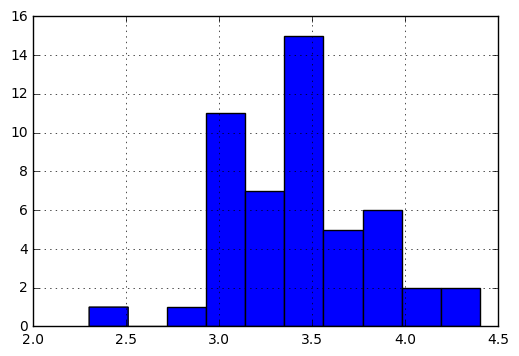

In [6]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [ ]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].plot(kind='box')

nemame dost dat na to aby nam boxplot ukazal nejakych outlierov, ale povedzme, ze domenovy expert povedal, ze setosa nemoze mat sepal width < 2.5

In [ ]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]

Otakza: Pride vam tam divne este nieco?
<!--
Napriklad trieda Iris-versicolor a zopar hodnot sepal_length_cm na uplne inej skale ako zvysok
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]
-->

Otakza: Co by sa s tym dalo spravit?

<!--
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()
-->

## Skusme sa pozriet este na tie chybajuce hodnoty

In [ ]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

Vsetko je to jedna trieda a jeden atribut. Mohlo by nam to vychylit model. Skusme to nahradit priemerom.

In [ ]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [ ]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

In [ ]:
# ak by sme to chceli len tak zahodit
# mozeme to spravit napriklad vtedy, ak mame dost dat aj bez toho
# iris_data.dropna(inplace=True)

In [ ]:
seaborn.pairplot(iris_data, hue='class')

# Sumar co si zobrat z tejto explorativnej analyzy

* Uisite sa, ze data su kodovane spravne (najcastejsie sa treba pozriet manualne do dat)
* Uistite sa, ze data spadaju do ocakavaneho rozsahu a vsetky maju ocakavany tvar (napriklad format casu)
* Porieste chybajuce data napriklad vyhodenim alebo nahradenim priemerom (priemer musi byt s ohladom na triedu)
* Nikdy nesahajte do dat manualne. Vzdy pouzivajte kod, ktory si odlozite a pouzijete vzdy ked budete opakovat experiment. Chceme aby bola analyza reprodukovatelna
* Spravte si grafy vsetkeho, co sa len da, aby ste si vizualne potvrdili, ze nieco je tak ako by malo byt

## SQL v Pandas

In [ ]:
from pandasql import sqldf

In [ ]:
from pandasql import load_meat, load_births

meat = load_meat()
births = load_births()

In [ ]:
type(meat)

In [ ]:
data = {'meat': meat}

In [ ]:
sqldf('select * from meat limit 10', data)

In [ ]:
data2 = {'meat2': meat}

In [ ]:
sqldf('select * from meat2 limit 10', data2)

In [ ]:
sqldf('select * from meat limit 10', locals())

In [ ]:
sqldf('select * from births limit 10', locals())

In [ ]:
q = """
    SELECT
        m.date
        , b.births
        , m.beef
    FROM
        meat m
    INNER JOIN
        births b
            on m.date = b.date
    ORDER BY
        m.date
    LIMIT 100;
    """

joined = sqldf(q, locals())
print(joined.head())

Pandasql bezi na SQLite3, takze vsetky klasicke opercaie v SQL viete robit aj tu. Funguju podmienky, vnorene dopyty, joiny, union, funkcie, ...

# Zopar dalsich uzitocnych veci pri praci s Pandas DataFrame

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df.head()

In [ ]:
# premenovanie vybranych stlpcov
df = df.rename(columns={'P': 'points', 
                        'GP': 'games',
                        'SOT': 'shots_on_target',
                        'G': 'goals',
                        'PPG': 'points_per_game',
                        'A': 'assists',})
df.head()

## transformacia hodnot v stlpci

In [ ]:
df['SALARY'] = df['SALARY'].apply(lambda x: x.strip('$m'))
df.head()

## Pridanie stlpcu

In [ ]:
df['team'] = pd.Series('', index=df.index)
df['position'] = pd.Series('', index=df.index)
df.head()

## Transformacia ineho stlpca  a naplnenie dalsich

In [ ]:
def process_player_col(text):
    name, rest = text.split('\n')
    position, team = [x.strip() for x in rest.split(' — ')]
    return pd.Series([name, team, position])

df[['PLAYER', 'team', 'position']] = df.PLAYER.apply(process_player_col)
df.head()

## Zistenie, kolko stlpcov ma prazden hodnoty

In [ ]:
df.shape[0] - df.dropna().shape[0]

## Vyber riadkov, kde su prazdne hodnoty

In [ ]:
df[df['assists'].isnull()]

## Vyber plnych riadkov

In [ ]:
df[df['assists'].notnull()]
# df[~df['assists'].isnull()]

## Nahradzanie prazdnych hodnot

In [ ]:
# predtym sme to robili manulane. 
# iris_data.loc[(iris_data['class'] == 'Iris-setosa') & (iris_data['petal_width_cm'].isnull()), 'petal_width_cm'] = average_petal_width

# Da sa na to pouzit takato pekna funkcia
df.fillna(value=0, inplace=True)
df

## Existuje vsak este elegantnejsi sposob

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df = df.rename(columns={'P': 'points', 
                        'GP': 'games',
                        'SOT': 'shots_on_target',
                        'G': 'goals',
                        'PPG': 'points_per_game',
                        'A': 'assists',})
df['SALARY'] = df['SALARY'].apply(lambda x: x.strip('$m'))
df[['PLAYER', 'team', 'position']] = df.PLAYER.apply(process_player_col)            
               
df.head()

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df[['games', 'assists']] = imp.fit_transform(df[['games', 'assists']].values)
df.head()

Pozor, toto doplnanie neberie do uvahy triedu ani ked na to ma volitelny atribut :(

In [ ]:
df.games.mean()

In [ ]:
df[df.position == 'Forward'].games.mean()

## Spajanie podmienok

In [ ]:
df[ (df['team'] == 'Arsenal') | (df['team'] == 'Chelsea') ]

In [ ]:
df[ (df['team'] == 'Arsenal') & (df['position'] == 'Forward') ]

# Nejake zdroje na studium
http://nbviewer.jupyter.org/format/slides/github/jorisvandenbossche/2015-PyDataParis/blob/master/pandas_introduction.ipynb
http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb